# Big Data Mart Sales Problem

#Problem Statement:
    
    
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Import Train dataset for github to predict Big Data Mart Sales Problem.



In [3]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Import Test Dataset from github and to predict train data as well as test data.



# Exploratory Data Analysis

In [4]:
#Checking shape of Train data.
train.shape

(8523, 12)

In [5]:
#Checking shape of Test data.
test.shape

(5681, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Getting information about data like as null value, dtypes, Columns.



In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Getting information about test data like as null value, dtypes, Columns.



In [8]:
#checking unique values in Train dataset.

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

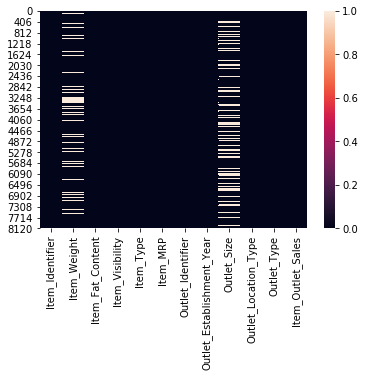

In [9]:
sns.heatmap(train.isnull())

Null values are present in train dataset.



In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

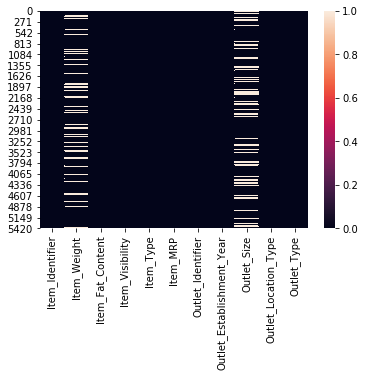

In [11]:
sns.heatmap(test.isnull())

There are two columns which have NaN values.



In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
train['Outlet_Size']=imp.fit_transform(train['Outlet_Size'].values.reshape(-1,1))
test['Outlet_Size']=imp.fit_transform(test['Outlet_Size'].values.reshape(-1,1))

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
train['Item_Weight']=imp.fit_transform(train['Item_Weight'].values.reshape(-1,1))
test['Item_Weight']=imp.fit_transform(test['Item_Weight'].values.reshape(-1,1))

Removing NaN value from both of datasets Train and Test data.



In [14]:
train.drop('Item_Identifier',axis=1,inplace=True)
test.drop('Item_Identifier',axis=1,inplace=True)

Drop Item_Identifier columns from both datasets.



In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Checking Identical Value in Item_Fat_Content column.


In [16]:
train.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
train.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
test.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
test.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
# Replacing reg with Regular 
train.Item_Fat_Content.replace('reg','Regular',inplace=True)
test.Item_Fat_Content.replace('reg','Regular',inplace=True)

Train Dataset Replacing LF,low fat with Low Fat Replacing reg with Regular



Test Dataset Replacing LF,low fat with Low Fat Replacing reg with Regular



# Train Data Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Item_Fat_Content'] = labelencoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = labelencoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = labelencoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = labelencoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = labelencoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = labelencoder.fit_transform(train['Outlet_Type'])
train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


# Test Data Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['Item_Fat_Content'] = labelencoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = labelencoder.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = labelencoder.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = labelencoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = labelencoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = labelencoder.fit_transform(test['Outlet_Type'])
test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
5,9.800000,1,0.063817,6,117.1492,8,1997,2,0,1
6,19.350000,1,0.082602,0,50.1034,3,2009,1,2,2
7,12.695633,0,0.015782,0,81.0592,5,1985,1,2,3
8,6.305000,1,0.123365,13,95.7436,7,2002,1,1,1
9,5.985000,0,0.005698,0,186.8924,2,2007,1,1,1


# Data Visualization

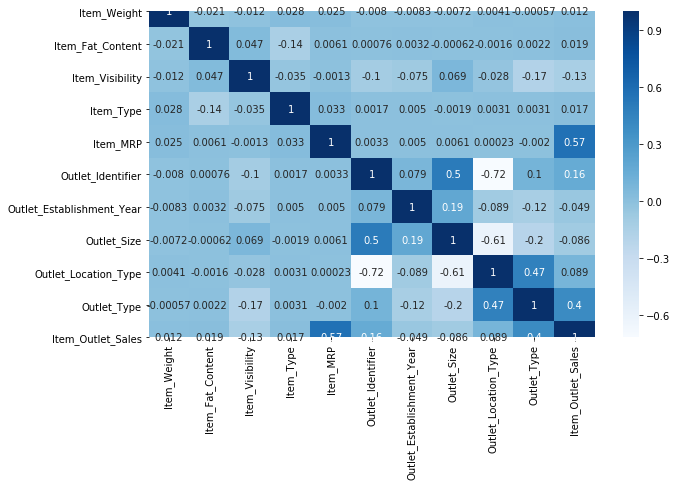

In [19]:
dfcor=train.corr()
dfcor
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

With the help of Correlatin checking relationship between all features.



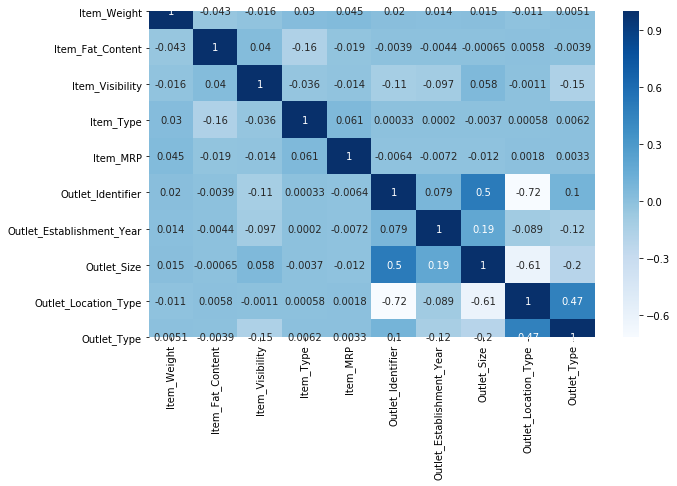

In [20]:
dfcor=test.corr()
dfcor
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

With the help of Correlatin checking relationship between all features.



# Univariate Analysis

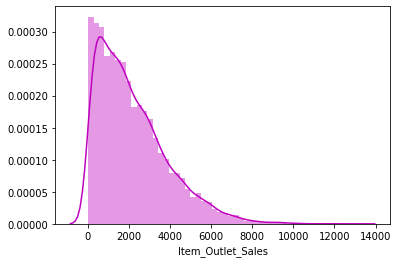

In [21]:
sns.distplot(train.Item_Outlet_Sales, color = "m")
plt.show()

checking Target Variable data distribution by Distplot



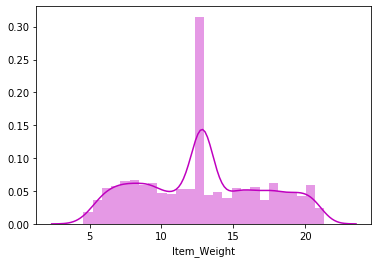

In [22]:
sns.distplot(train.Item_Weight, color = "m")
plt.show()

Ploting Item_Weight column with the help of distplot to check data distibution.



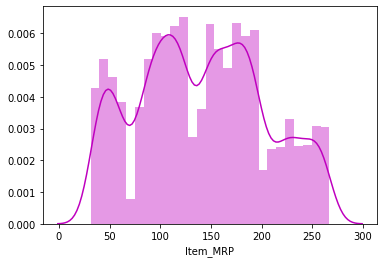

In [23]:
sns.distplot(train.Item_MRP, color = "m")
plt.show()

# Bivariate Analysis

Ploting Item_MRP column with the help of distplot to check data distibution.



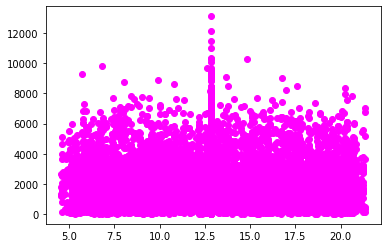

In [24]:
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = "magenta");

Checking Relationship between Item_Weight and Item_Outlet_Sales with the help of Scatterplot.



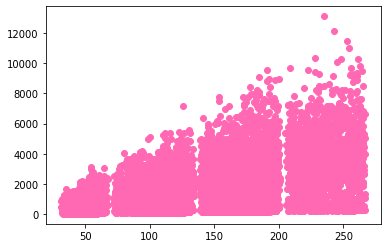

In [25]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "hotpink");

Checking Relationship between Item_MRP and Item_Outlet_Sales with the help of Scatterplot.



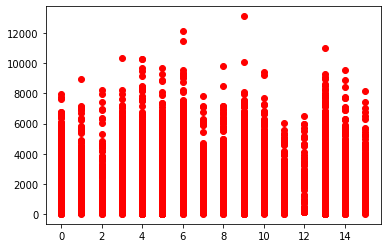

In [26]:
plt.scatter(train.Item_Type, train.Item_Outlet_Sales, color = "red");

Checking Relationship between Item_Type and Item_Outlet_Sales with the help of Scatterplot.



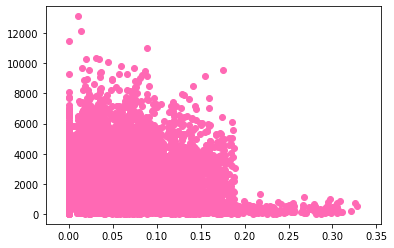

In [27]:
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "hotpink");

Checking Relationship between Item_Visibility and Item_Outlet_Sales with the help of Scatterplot.



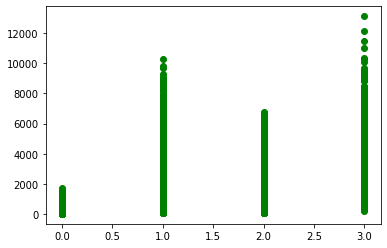

In [28]:
plt.scatter(train.Outlet_Type, train.Item_Outlet_Sales, color = "green");

Checking Relationship between Outlet_Type and Item_Outlet_Sales with the help of Scatterplot.



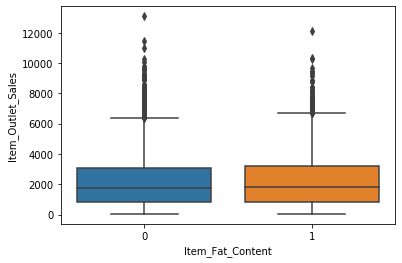

In [29]:
sns.boxplot(train.Item_Fat_Content, train.Item_Outlet_Sales)

Ploting Item_Fat_Content and Item_Outlet_Sales columns with the help of Boxplot.



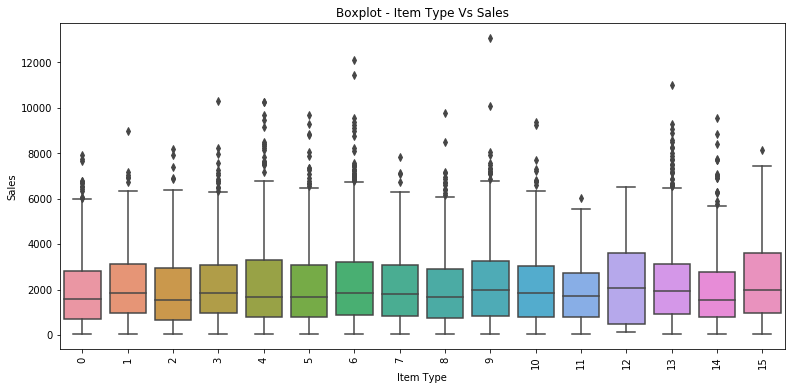

In [30]:
plt.figure(figsize = [13,6])
sns.boxplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Item Type Vs Sales")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()

relating Item Type with Sales with the help of Boxplot.



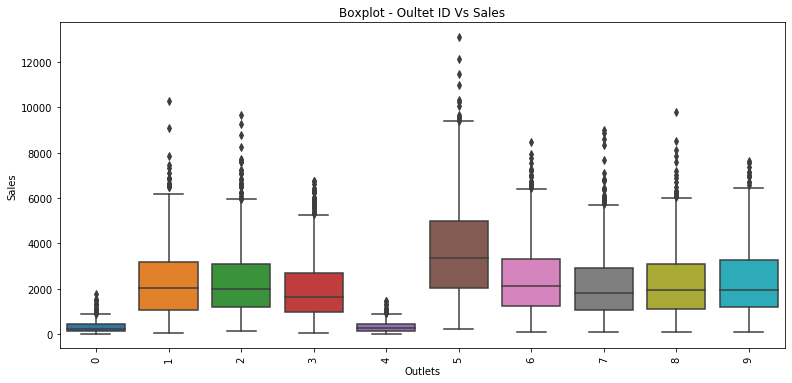

In [31]:
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet ID Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

Relating Outlets and Sales with the help of Boxplot



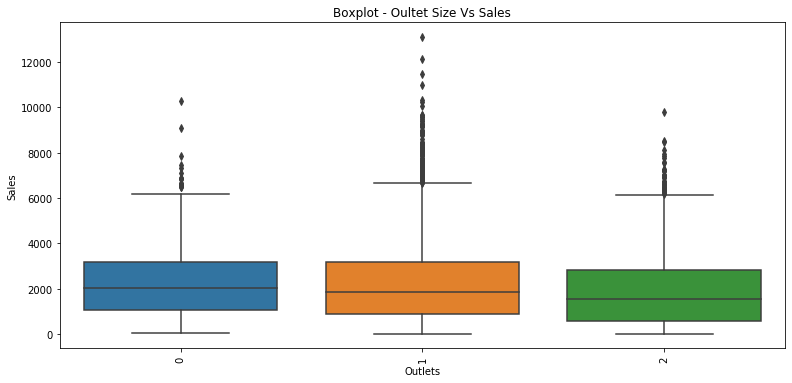

In [32]:
plt.figure(figsize = [13,6])
sns.boxplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.title("Boxplot - Oultet Size Vs Sales")
plt.xlabel("Outlets")
plt.ylabel("Sales")
plt.show()

Checking relationship between Outlet Size and Sales.



# Multivariate Analysis

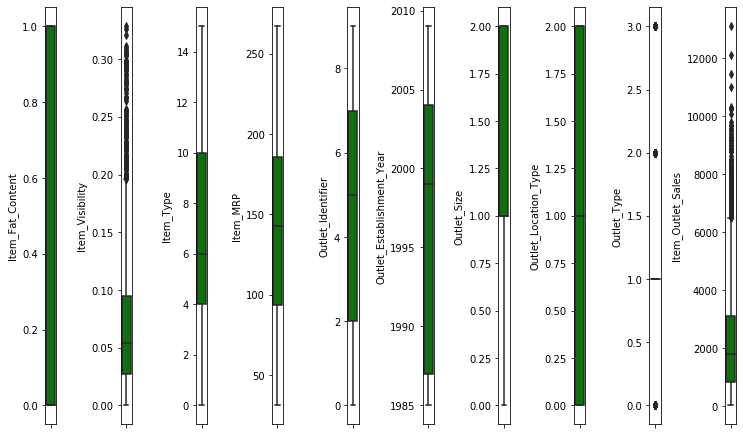

In [33]:
collist=train.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find all columns outliers in a one place.



# Zscore Value

In [34]:
from scipy.stats import zscore

In [35]:
z=np.abs(zscore(train))
z

array([[0.84187169, 0.73814723, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.64170589, 1.35474328, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.09855449, 0.73814723, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.53424315, 0.73814723, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.33644372, 1.35474328, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.45963367, 0.73814723, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

Applying Zscore functionality on entire data to remove outliers.



In [36]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

Set Threshold Point and Markdown all those values that is above threshold point.



In [37]:
train_new=train[(z<3).all(axis=1)]
train_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


With the help of above functionality we are trying to get all the values that is below from threshold point.



In [38]:
train.shape

(8523, 11)

In [39]:
train_new.shape

(8338, 11)

In [40]:
(301/8523)*100

3.5316203214830457

# Feature Engg.

In [41]:
data_types = train_new.dtypes
for cols in train_new.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(train_new[cols],drop_first=True)
        train_new.drop(cols,axis=1,inplace=True)
        train_new = pd.concat([train_new,temp],axis=1)

In [42]:
train_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,1,1,2,3,4,...,7,8,9,1,2,1,2,1,2,3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [43]:
x=train_new.drop('Item_Outlet_Sales',axis=1)
y=train_new['Item_Outlet_Sales']

In [44]:
x.shape

(8338, 36)

In [45]:
y.shape

(8338,)

# Applying Zscore Value on Test Dataset.

In [46]:
z=np.abs(zscore(test))
z

array([[1.89745979, 0.74081066, 1.13407715, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [1.03552991, 1.34987258, 0.53185019, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.44863355, 0.74081066, 0.6613164 , ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [0.63504136, 0.74081066, 0.15307374, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.6135406 , 1.34987258, 1.28168987, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.75283211, 1.34987258, 0.76171558, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [47]:
threshold=3
print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [48]:
test_new=test[(z<3).all(axis=1)]
test_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


In [49]:
test.shape

(5681, 10)

In [50]:
test_new.shape

(5600, 10)

In [51]:
(156/5681)*100

2.745995423340961

# Feature Engg.

In [52]:
data_types = test_new.dtypes
for cols in test_new.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(test_new[cols],drop_first=True)
        test_new.drop(cols,axis=1,inplace=True)
        test_new = pd.concat([test_new,temp],axis=1)

# Data Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,1,1,2,3,4,5,...,7,8,9,1,2,1,2,1,2,3
0,-0.837178,-1.011507,1.771831,0.120549,-0.736645,-0.174722,-0.112386,-0.288337,3.424875,-0.334265,...,-0.353028,-0.353243,2.827473,0.799828,-0.622007,-0.704945,-0.797813,0.709334,-0.353887,-0.342411
1,-1.632036,-0.943320,-1.482939,1.322724,1.357506,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,0.799828,-0.622007,-0.704945,1.253426,-1.409773,2.825759,-0.342411
2,1.091176,-0.996464,0.024597,0.120549,-0.736645,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,2.827473,0.799828,-0.622007,-0.704945,-0.797813,0.709334,-0.353887,-0.342411
3,1.490957,-1.350181,0.678281,0.000332,1.357506,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,0.799828,-0.622007,-0.704945,1.253426,-1.409773,-0.353887,-0.342411
4,-0.924189,-1.350181,-1.392628,-1.322060,-0.736645,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,-1.250269,-0.622007,-0.704945,1.253426,0.709334,-0.353887,-0.342411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,-1.409805,-0.151783,1.201957,-1.322060,-0.736645,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,-1.250269,-0.622007,-0.704945,1.253426,0.709334,-0.353887,-0.342411
8334,-1.053529,-0.358630,-0.515781,0.481201,1.357506,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,2.832633,-0.353243,-0.353673,0.799828,-0.622007,1.418550,-0.797813,0.709334,-0.353887,-0.342411
8335,-0.531463,-0.607585,-0.887778,0.721636,-0.736645,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,-1.250269,1.607699,1.418550,-0.797813,0.709334,-0.353887,-0.342411
8336,-1.328673,1.714661,-0.596913,1.322724,1.357506,-0.174722,-0.112386,-0.288337,-0.291981,-0.334265,...,-0.353028,-0.353243,-0.353673,0.799828,-0.622007,-0.704945,1.253426,-1.409773,2.825759,-0.342411


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(test_new)
dx=pd.DataFrame(dx,columns=test_new.columns)
dx

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,1,1,2,3,4,5,...,7,8,9,1,2,1,2,1,2,3
0,1.888840,-1.205139,-0.538563,0.128501,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,2.834124,0.795395,-0.618365,-0.704078,-0.802895,0.711752,-0.352202,-0.354121
1,-1.032779,-0.532968,-0.871149,1.085897,1.354256,-0.172049,-0.11651,-0.286211,3.395286,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121
2,0.445631,0.798776,1.629171,0.008826,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,-0.704078,1.245493,-1.404983,-0.352202,-0.354121
3,-1.263927,-1.034748,0.225158,1.085897,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121
4,-0.001263,1.213115,1.507359,-1.546944,1.354256,-0.172049,-0.11651,-0.286211,3.395286,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,-0.704078,1.245493,-1.404983,-0.352202,2.823891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,-0.516509,-1.075952,0.003051,-0.110849,1.354256,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,2.834124,-0.352843,-1.257237,1.617169,-0.704078,-0.802895,0.711752,-0.352202,-0.354121
5596,-1.197046,1.744347,0.453615,1.325247,1.354256,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,-0.704078,1.245493,-1.404983,2.839276,-0.354121
5597,-0.633843,0.231505,-0.362385,0.487524,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,2.836697,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121
5598,0.609899,-1.369896,1.189898,1.085897,1.354256,-0.172049,-0.11651,3.493930,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121


In [55]:
Test=dx

# Spliting X and y into Train data and Test data for model building.

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

# Model Building

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [58]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
lr.coef_

array([-8.60194033e+00, -8.05028408e+00,  9.18381866e+02,  6.71893308e+13,
        1.47562234e+01, -9.09497396e-02, -1.57442052e+01,  1.73233468e+01,
       -2.08480506e+01,  1.84597121e+00, -1.57843721e+01,  1.12561030e+01,
        2.95948150e+00, -8.53361299e+00,  4.81772799e+00,  2.40237211e+00,
        9.51475274e+00, -1.61377522e+01, -1.46945432e+01,  1.80825526e+01,
        2.31142791e+14, -2.44554953e+14, -1.54466424e+14, -8.92653688e+13,
        2.62750913e+13, -9.14612860e+13, -2.32575996e+14, -4.46340328e+13,
       -1.96234364e+14,  1.49512463e+14, -7.15156571e+13,  4.35255089e+13,
       -4.66111485e+14, -1.60413479e+14,  1.26522864e+14,  5.90668783e+12])

In [60]:
lr.intercept_

2138.5158939939133

In [61]:
lr.score(X_train,y_train)

0.5589248519346597

In [62]:
pred=lr.predict(X_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [1835.96120722 2641.0307873  2132.96120722 ... 1885.8120373  1018.9995373
 2653.33620722]
Actual Price,y_test


error:
Mean absolute error: 788.1378002795901
Mean squared error: 1075447.4765481623
Root Mean Squared error: 1037.0378375682164
0.5547417053377522


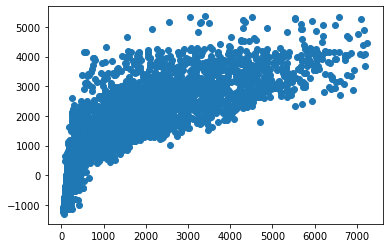

In [63]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
plt.scatter(y_test,pred)
plt.show()

# Ramdom Forest Regressor

In [64]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred=rf.predict(X_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [1642.8615   2236.462148 2324.361064 ... 2120.646238  902.95796
 2845.822282]
Actual Price,y_test
error:
Mean absolute error: 755.8291614869186
Mean squared error: 1116038.3982588274
Root Mean Squared error: 1056.4271854978115
0.5379361941679559


# Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
Enr=ElasticNet(alpha=0.0001)
Enr.fit(X_train,y_train)
Enrpred=Enr.predict(X_test)
print(Enr.score(X_train,y_train))
Enr.coef_

0.5589255581268148


array([-8.58565775e+00, -8.10816257e+00,  9.18385790e+02, -1.85891718e+02,
        1.45732707e+01, -1.33211088e-01, -1.57797924e+01,  1.71928755e+01,
       -2.10515374e+01,  1.97526714e+00, -1.57154097e+01,  1.12681049e+01,
        2.95769388e+00, -8.46595785e+00,  4.78848616e+00,  2.36924764e+00,
        9.49852473e+00, -1.61355117e+01, -1.46315073e+01,  1.80519331e+01,
        2.49619652e+02,  3.17834662e+02,  1.64487733e+02, -2.49485676e+02,
        4.33413066e+02,  1.40659757e+02,  2.06910943e+02,  2.23907583e+02,
        4.42451909e+02, -3.04362258e+02, -4.85796459e+01,  2.84260719e+02,
       -1.73708285e+02,  1.34962988e+02,  4.32957927e+02,  4.53528600e+02])

In [68]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.5358813886313325


# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f" % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.552323366970595
Residual sum of squares: 1075447.48


In [71]:
Test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,1,1,2,3,4,5,...,7,8,9,1,2,1,2,1,2,3
0,1.888840,-1.205139,-0.538563,0.128501,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,2.834124,0.795395,-0.618365,-0.704078,-0.802895,0.711752,-0.352202,-0.354121
1,-1.032779,-0.532968,-0.871149,1.085897,1.354256,-0.172049,-0.11651,-0.286211,3.395286,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121
2,0.445631,0.798776,1.629171,0.008826,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,-0.704078,1.245493,-1.404983,-0.352202,-0.354121
3,-1.263927,-1.034748,0.225158,1.085897,-0.738413,-0.172049,-0.11651,-0.286211,-0.294526,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,1.420296,-0.802895,0.711752,-0.352202,-0.354121
4,-0.001263,1.213115,1.507359,-1.546944,1.354256,-0.172049,-0.11651,-0.286211,3.395286,-0.332009,...,-0.352523,-0.352843,-0.352843,0.795395,-0.618365,-0.704078,1.245493,-1.404983,-0.352202,2.823891


# Prediction with Random Forest Regressor

In [72]:
Item_Outlet_Sales = rf.predict(Test)

In [73]:
Item_Outlet_Sales

array([1780.522308, 1352.692544,  583.100982, ..., 1319.023038,
       5222.009218, 1279.387964])

In [74]:
df = pd.DataFrame(data =Item_Outlet_Sales )
df

,0
0,1780.522308
1,1352.692544
2,583.100982
3,2084.912752
4,3314.165976
...,...
5595,2331.132250
5596,2134.268506
5597,1319.023038
5598,5222.009218


# Saving Model

In [75]:
import joblib
joblib.dump(lr,'BigMartSales.obj')

['BigMartSales.obj']

In [76]:
import joblib
joblib.dump(lr,'BigMartSales.pkl')

['BigMartSales.pkl']

# Loading the Model

In [77]:
mod = joblib.load('BigMartSales.pkl')

# Conclusion

The linear regression algorithm performing good  